In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
class BinaryRegularizesLogisticRegression():
    
    class fit():
        def __init__(self,X,y,iterations=100000,lr=0.001,lamda=0.1):
            """ Here, X contains covariates, y contains outcomes, lr = learning rate, lamda = reguralized term
            dimension of X is m by n; 
            dimension of y is m by 1; 
            dimesion of W is n by 1
            m = number of training set; 
            n = number of input features/covariates/variables 
            """
            # reshape x and y for coding convenient
            X = X.T
            y = y.T
            
            # determine m & n
            self.m = X.shape[1]
            self.n = X.shape[0]
            self.lamda = lamda
            self.lr = lr
            self.iterations = iterations

            # define theta. Remember dimesion has to be n by 1
            W = np.zeros([self.n,1])
            B = 0

            cost_list = []

            for i in range(iterations):
                cost, W, B = self.cost_grad_function(X,y,W,B)
                cost_list.append(cost)
            self.W = W
            self.B = B
            self.all_cost = cost_list
        
        def iterations_vs_cost_graph(self):
            plt.plot(np.arange( self.iterations), self.all_cost)
            plt.xlabel("Number of iterations")
            plt.ylabel("Cost")
            plt.show()

        def predict(self,X):
            h = self.predict_proba(X)
            y_predict = h > 0.5
            y_predict = np.array(y_predict, dtype="int64")
            return y_predict

        def predict_proba(self,X):
            """ dimesion of X has to be number of test_set(m) by number of features(n)"""
            z = np.dot(self.W.T,X.T) + self.B
            h = self.sigmoid(z)
            return h
            
        def accuracy(self, X_test, Y_test):
            prediction = self.predict(X_test)
            y_predict = prediction.T
            return (1 - np.sum(np.abs(y_predict - Y_test))/Y_test.shape[0])*100      
        
        
        def sigmoid(self,z):
            return 1/(1+np.exp(-z))
    
        def cost_grad_function(self,X,y,W,B):
            """ find the cost; 
            dimension of X is n by m; 
            dimension of y is 1 by m; 
            dimesion of W is n by 1
            m = number of training set; 
            n = number of input features/covariates/variables 
            """
            z = np.dot(W.T,X) + B
            h = self.sigmoid(z)
            cost_before = -(1/self.m)*np.sum((y*np.log(h) + (1-y)*np.log(1-h)))
            cost = cost_before + (self.lamda/(2*self.m))*np.sum(np.square(W))
            
            # gradient descent
            dW = ((1/self.m)*np.dot((h - y), X.T)) + (self.lamda/self.m) * W.T
            dW = dW.T
            dB = (1/self.m)*np.sum(h - y)

            W = W - self.lr*dW
            B = B - self.lr*dB
            return cost, W, B

In [22]:
test_x = pd.read_csv("test_X.csv")
test_y = pd.read_csv("test_Y.csv")
train_x = pd.read_csv("train_X.csv")
train_y = pd.read_csv("train_Y.csv")


x_train = train_x.drop("Id", axis = 1)
x_test = test_x.drop("Id", axis = 1)
y_train = train_y.drop("Id", axis =1)
y_test = test_y.drop("Id", axis = 1)


X_train = x_train.values
Y_train = y_train.values
X_test = x_test.values
Y_test = y_test.values

In [23]:
lg = BinaryRegularizesLogisticRegression()
classifier = lg.fit(X_train, Y_train)

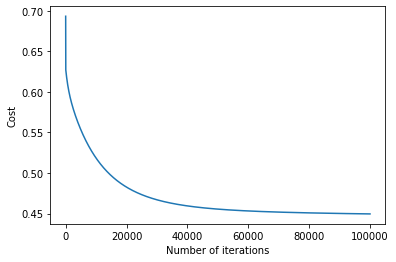

In [24]:
classifier.iterations_vs_cost_graph()

In [25]:
classifier.predict(X_test[0:6,:])

array([[0, 0, 0, 0, 1, 0]], dtype=int64)

In [26]:
classifier.predict_proba(X_test[0:6,:])

array([[0.10323573, 0.48353973, 0.11715068, 0.12360462, 0.59604923,
        0.15719856]])

In [27]:
classifier.accuracy(X_test, Y_test)

92.10526315789474